<a href="https://colab.research.google.com/github/JoaoP29/abcia/blob/main/insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#importing data
df = pd.read_csv('insurance.csv')

#visualizing data frame
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
#brief description of the data
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#sex
le.fit(df.sex)
df.sex = le.transform(df.sex)

#smoker
le.fit(df.smoker)
df.smoker = le.transform(df.smoker)

#region
le.fit(df.region)
df.region = le.transform(df.region)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [6]:
#correlation table
corr = df.corr()
corr

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,-0.020856,0.109341,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046380,0.017163,0.076185,0.004588,0.057292
bmi,0.109341,0.046380,1.000000,0.012645,0.003968,0.157439,0.198576
children,0.042469,0.017163,0.012645,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003968,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157439,0.016569,-0.002181,1.000000,-0.006208
expenses,0.299008,0.057292,0.198576,0.067998,0.787251,-0.006208,1.000000


<Axes: >

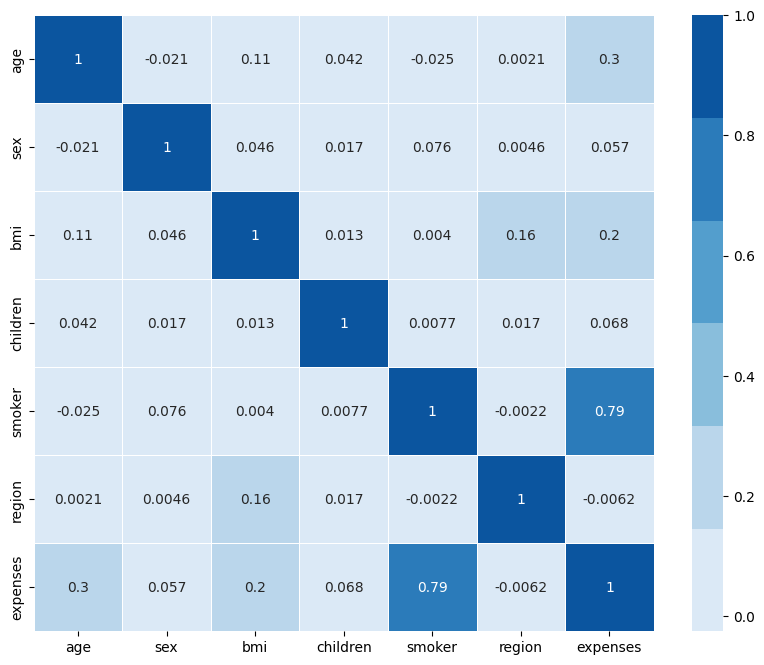

In [7]:
#visualizing the correlation
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap=sns.color_palette('Blues'), linewidth = .5, annot = True)

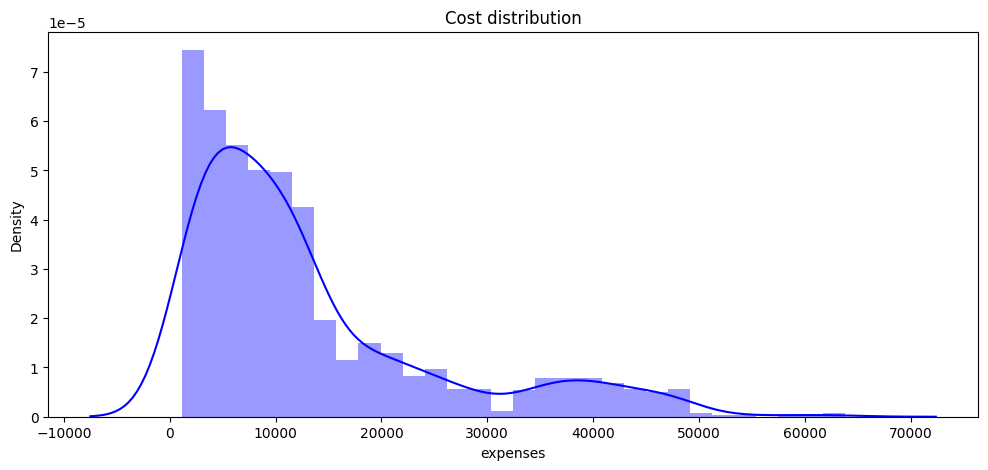

In [8]:
#Cost distribution
plt.figure(figsize=(12,5))
plt.title('Cost distribution')
ax = sns.distplot(df['expenses'], color = 'b')

Text(0.5, 1.0, 'Distribution of expenses per no-smokers')

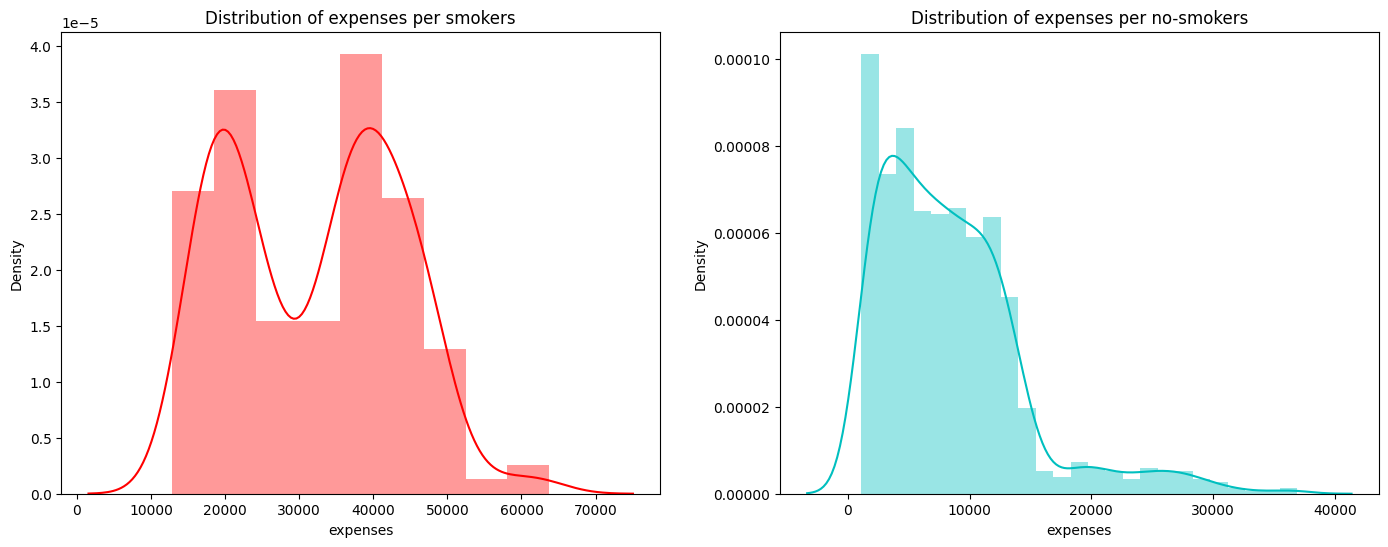

In [9]:
#Distribution of expenses per smokers and per no-smokers
fig = plt.figure(figsize=(17, 6))

ax = fig.add_subplot(121)
sns.distplot(df[(df.smoker == 1)]['expenses'], color = 'r', ax = ax)
ax.set_title('Distribution of expenses per smokers')

ax = fig.add_subplot(122)
sns.distplot(df[df.smoker == 0]['expenses'], color = 'c', ax = ax)
ax.set_title('Distribution of expenses per no-smokers')

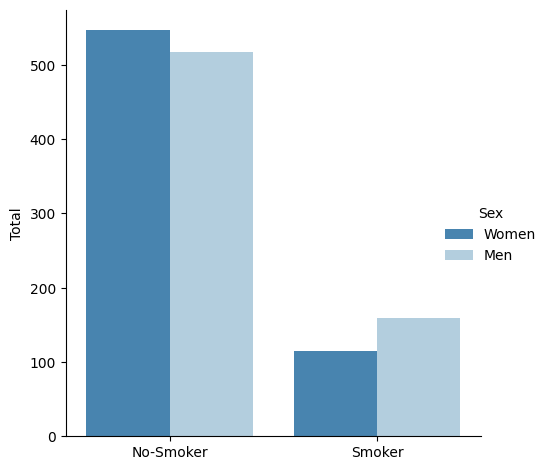

In [10]:
#Total of smokers and no-smokers per sex
g = sns.catplot(x = 'smoker', kind = 'count', hue = 'sex', palette = 'Blues_r',
                data = df, legend_out = True)

#Axis
(g.set_axis_labels('', 'Total')
.set_xticklabels(['No-Smoker', 'Smoker'])
)

#Legend
g._legend.set_title('Sex')
new_labels = ['Women', 'Men']
for t, l in zip(g._legend.texts, new_labels):
  t.set_text(l)

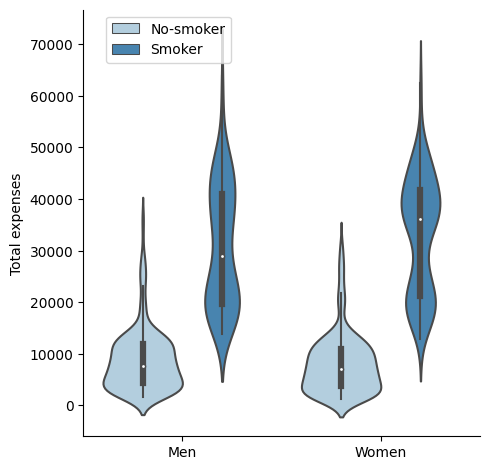

In [11]:
#Expenses distribution per smoker and no-smoker per sex
g = sns.catplot(x = 'sex', y = 'expenses', hue = 'smoker', kind = 'violin',
                data = df, palette = 'Blues', legend_out = False, ax = ax)

#Axis
(g.set_axis_labels('', 'Total expenses')
.set_xticklabels(['Men', 'Women'])
)

#Legend
leg = g.axes.flat[0].get_legend()
new_title = ''
leg.set_title(new_title)
new_labels = ['No-smoker', 'Smoker']
for t, l in zip(g._legend.texts, new_labels):
  t.set_text(l)

g._legend.set_bbox_to_anchor((.39, 1))

<Axes: title={'center': 'Expenses distribution per age and per smoker'}, xlabel='age', ylabel='expenses'>

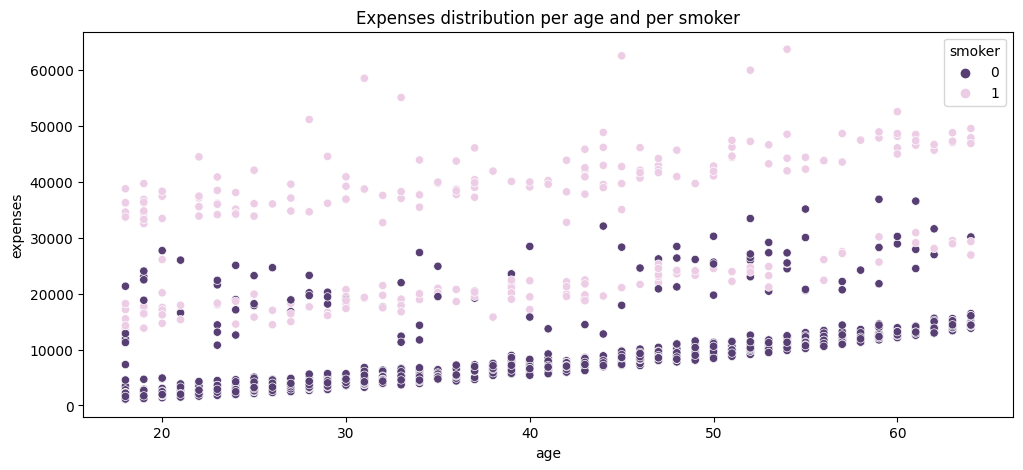

In [12]:
#Expenses distribution per age and per smoker
plt.figure(figsize=(12, 5))
plt.title('Expenses distribution per age and per smoker')

sns.scatterplot(x = df.age, y = df.expenses, hue = df.smoker, sizes = (12, 5),
                palette = 'ch:r = .2, d = .3_r')

In [20]:
#Separating data
X = df.drop(['expenses'], axis = 1)
y = df.expenses

In [24]:
#Separating test and traning data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 0)

In [25]:
#Creating a Linear Regression object
lr_model = LinearRegression()

In [26]:
#Training the model
lr_model.fit(X_train, y_train)

LinearRegression()

In [27]:
#Result checking

#It predict prices for x_test
y_pred = lr_model.predict(X_test)
y_pred

array([1.10164979e+04, 9.79683259e+03, 3.80048182e+04, 1.61281767e+04,
       6.94559901e+03, 3.97587241e+03, 1.54637413e+03, 1.42881974e+04,
       8.95027487e+03, 7.44356450e+03, 4.54416770e+03, 1.02400654e+04,
       8.65683114e+03, 4.12223227e+03, 2.78093251e+04, 1.10526007e+04,
       1.12431047e+04, 6.03391888e+03, 8.18611238e+03, 2.70425154e+04,
       3.35772472e+04, 1.42600568e+04, 1.16920532e+04, 3.23949107e+04,
       4.42430713e+03, 9.13425787e+03, 1.13000205e+03, 1.00894942e+04,
       4.07412778e+03, 1.03580065e+04, 8.96553464e+03, 4.02302924e+04,
       1.54769673e+04, 1.36663652e+04, 2.47327701e+04, 5.11947388e+03,
       1.28526522e+04, 3.05253009e+04, 3.34357622e+04, 3.48834462e+03,
       4.01568770e+03, 4.26422558e+03, 3.04555336e+04, 3.93620614e+04,
       2.80187860e+04, 5.00997785e+03, 1.09212218e+04, 7.77262751e+03,
       3.59279462e+03, 1.05628707e+04, 5.64084744e+03, 3.36950464e+03,
       3.28456506e+04, 3.83740724e+04, 1.62520379e+04, 7.05034226e+03,
      

In [29]:
#Evaluating the model
r2 = r2_score(y_test, y_pred)
print('Coeficiente de Determinação (R^2):', r2)

Coeficiente de Determinação (R^2): 0.7999053396503137


In [30]:
print('Intercepto:', lr_model.intercept_)

Intercepto: -11663.165438316819


In [31]:
coeff_df = pd.DataFrame(lr_model.coef_, X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
age,253.965342
sex,-24.555525
bmi,328.447278
children,444.004411
smoker,23567.598126
region,-288.363716


In [32]:
y_pred = lr_model.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 3930.2173746197836
MSE: 31841055.888540443
RMSE: 5642.787953533292
